
SVM IRIS RESULTS

Kernel: LINEAR
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



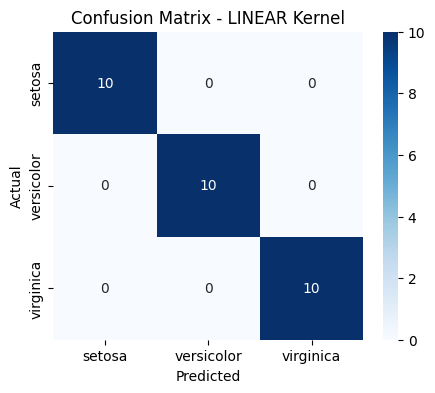


Kernel: POLY
Accuracy: 0.9666666666666667
Precision: 0.9696969696969696
Recall: 0.9666666666666667
F1-Score: 0.9665831244778613

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



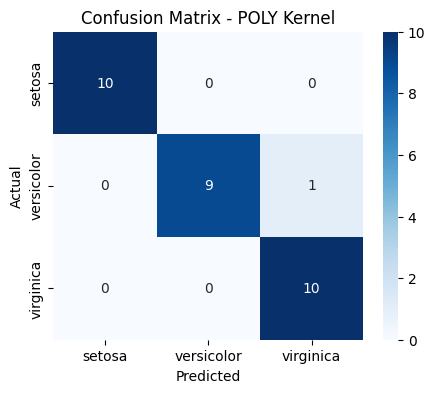


Kernel: RBF
Accuracy: 0.9666666666666667
Precision: 0.9696969696969696
Recall: 0.9666666666666667
F1-Score: 0.9665831244778613

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



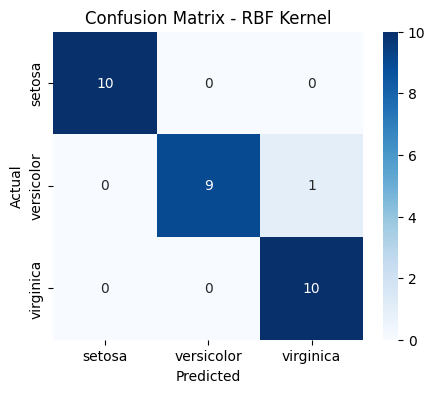

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

kernels = ["linear", "poly", "rbf"]
models = {}

for k in kernels:
    if k == "poly":
        svm = SVC(kernel=k, degree=3)
    else:
        svm = SVC(kernel=k)
    svm.fit(X_train, y_train)
    models[k] = svm

print("\nSVM IRIS RESULTS")
for k, model in models.items():
    y_pred = model.predict(X_test)

    print(f"\nKernel: {k.upper()}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.title(f"Confusion Matrix - {k.upper()} Kernel")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42, stratify=y
)

svm_no_scale = SVC(kernel='rbf')
svm_no_scale.fit(x_train, y_train)

train_acc_no_scale = svm_no_scale.score(x_train, y_train)
test_acc_no_scale = svm_no_scale.score(x_test, y_test)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

svm_scaled = SVC(kernel='rbf')
svm_scaled.fit(x_train_scaled, y_train)

train_acc_scaled = svm_scaled.score(x_train_scaled, y_train)
test_acc_scaled = svm_scaled.score(x_test_scaled, y_test)

print("\nBREAST CANCER SVM (RBF) RESULTS")
print("\nWithout Feature Scaling")
print("Training Accuracy:", train_acc_no_scale)
print("Testing Accuracy :", test_acc_no_scale)

print("\nWith StandardScaler")
print("Training Accuracy:", train_acc_scaled)
print("Testing Accuracy :", test_acc_scaled)



BREAST CANCER SVM (RBF) RESULTS

Without Feature Scaling
Training Accuracy: 0.9186813186813186
Testing Accuracy : 0.9298245614035088

With StandardScaler
Training Accuracy: 0.9824175824175824
Testing Accuracy : 0.9824561403508771
